In [1]:
from utils import *
from extract_feature_AE import *
from extract_feature_PCA import *

c:\Users\quock\anaconda3\envs\QuocKhanh\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np
np.random.seed(42)

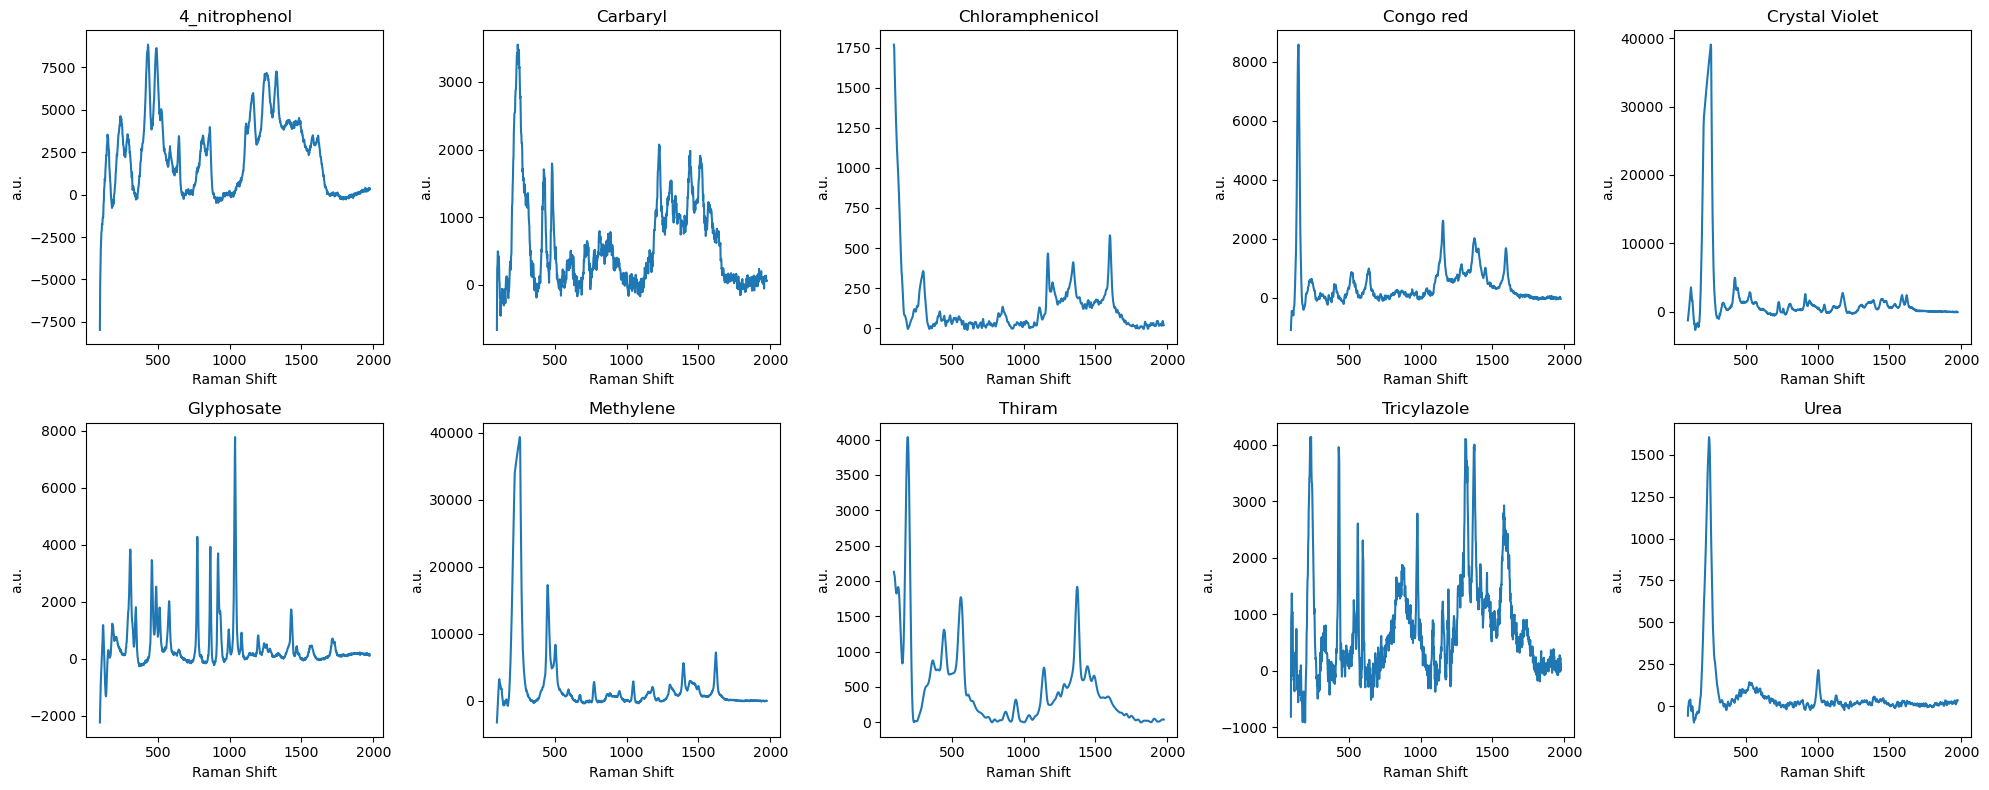

In [3]:
plot_data(paths, labels, file_names[0], 2, 5, figsize = (20, 8))

In [4]:
X, y = make_data(paths)
print(X.shape, y.shape)


(50, 2047) (50, 1)


In [5]:
X_min = X.min(axis=0, keepdims=True)
X_max = X.max(axis=0, keepdims=True)
X_mean = np.mean(X)
X_std = np.std(X)

In [6]:
# X= Norm(X, X_min, X_max, X_mean, X_std)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, stratify=y, shuffle= True, random_state= 42)

In [8]:
X_min = X_train.min(axis=0, keepdims=True)
X_max = X_train.max(axis=0, keepdims=True)
X_mean = np.mean(X_train)
X_std = np.std(X_train)

In [9]:
X_train = Norm(X_train, X_min, X_max, X_mean, X_std)
X_test  = Norm(X_test, X_min, X_max, X_mean, X_std)

In [10]:
y_test

array([[0.],
       [9.],
       [3.],
       [4.],
       [8.],
       [5.],
       [2.],
       [4.],
       [6.],
       [5.],
       [2.],
       [9.],
       [7.],
       [3.],
       [0.],
       [1.],
       [8.],
       [6.],
       [1.],
       [7.]])

In [11]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(30, 2047) (30, 1) (20, 2047) (20, 1)


In [12]:
Grid_search_model(X_train,y_train, cv = 3)

Best parameters for Logistic Regression: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}, score: 0.90
Time taken for Logistic Regression: 8.53 seconds

Best parameters for SVM: {'C': 1.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}, score: 0.80
Time taken for SVM: 2.02 seconds

Best parameters for KNN: {'algorithm': 'auto', 'metric': 'cosine', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}, score: 0.90
Time taken for KNN: 7.34 seconds

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}, score: 0.57
Time taken for Decision Tree: 5.88 seconds

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}, score: 0.83
Time taken for Random Forest: 134.00 seconds

Best parameters for Naive Bayes: {'alpha': 0.01}, score: 0.10
Time taken for Naive Bayes:

In [15]:
models = [LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear'),
          SVC(C = 1, degree = 2, gamma = 'scale', kernel = 'linear', shrinking = True,  probability=True),
          KNeighborsClassifier(algorithm = 'auto', metric = 'cosine', n_neighbors = 1, p = 1, weights = 'uniform'),
          DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 1, min_samples_split = 2, splitter= 'best',  random_state = 42),
          RandomForestClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 100,  random_state = 42),
          BernoulliNB(alpha=0.1)]

In [16]:
for i, model in enumerate(models):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model.fit(X_train, y_train)
    file_name = f"./model/{type(models[i]).__name__}.pkl"
    save_model(file_name, model)


Model './model/LogisticRegression.pkl' already saved
Model './model/SVC.pkl' already saved
Model './model/KNeighborsClassifier.pkl' already saved
Model './model/DecisionTreeClassifier.pkl' already saved
Model './model/RandomForestClassifier.pkl' already saved
Model './model/BernoulliNB.pkl' already saved


Testing with LogisticRegression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
[0. 9. 3. 4. 8. 5. 2. 4. 6. 5. 2. 9. 7. 3. 0. 1. 8. 6. 1. 7.]
[[0. 9. 3. 4. 8. 5. 2. 4. 6. 5. 2. 9. 7. 3. 0. 1. 8. 6. 1. 7.]]


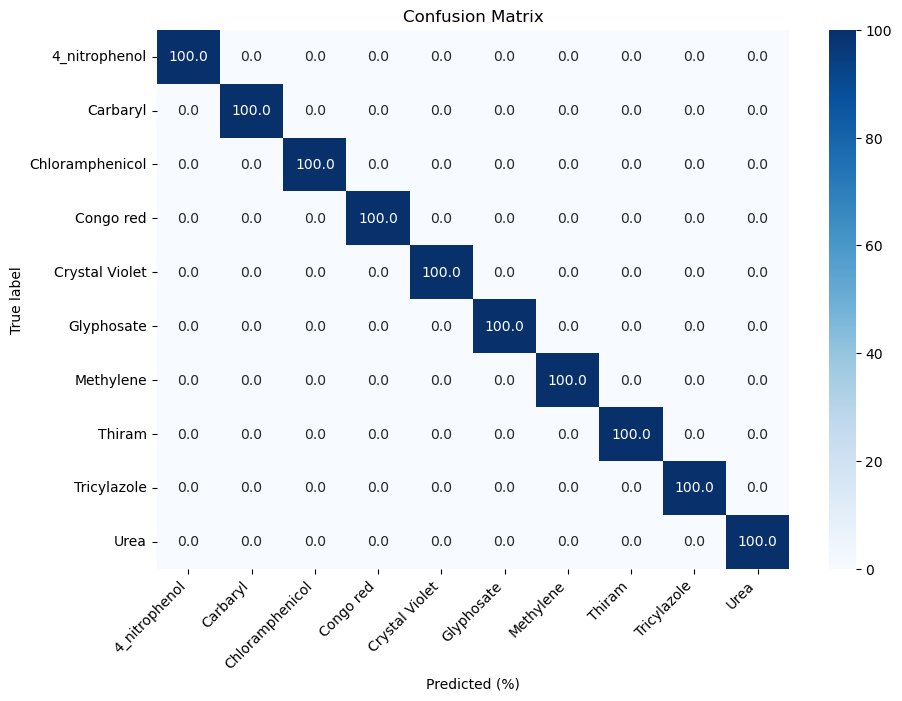

In [17]:
print(model_predict(X_test, y_test, models[0], X_min, X_max, X_mean, X_std)['Predict'])
print(y_test.T)

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

logistic_clf = LogisticRegression(C=10, penalty='l2', solver='liblinear')
svc_clf = SVC(C=1, degree=2, gamma='scale', shrinking=True, probability=True, kernel='linear')
knn_clf = KNeighborsClassifier(algorithm='auto', p=1, weights='uniform', n_neighbors=3, metric='cosine')


ensemble_clf = VotingClassifier(
    estimators=[
        ('logistic', models[0]),
        ('svc', models[1]),
        ('knn', models[2]),
        ('decision tree', models[3]),
        ('random_forest', models[4]),
        ('naive_bayes', models[5])
    ],
    voting='soft'
)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ensemble_clf.fit(X_train, y_train)


Testing with VotingClassifier
Accuracy: 0.9500
Precision: 0.9667
Recall: 0.9500
F1-score: 0.9467
[3. 9. 3. 4. 8. 5. 2. 4. 6. 5. 2. 9. 7. 3. 0. 1. 8. 6. 1. 7.]
[[0. 9. 3. 4. 8. 5. 2. 4. 6. 5. 2. 9. 7. 3. 0. 1. 8. 6. 1. 7.]]


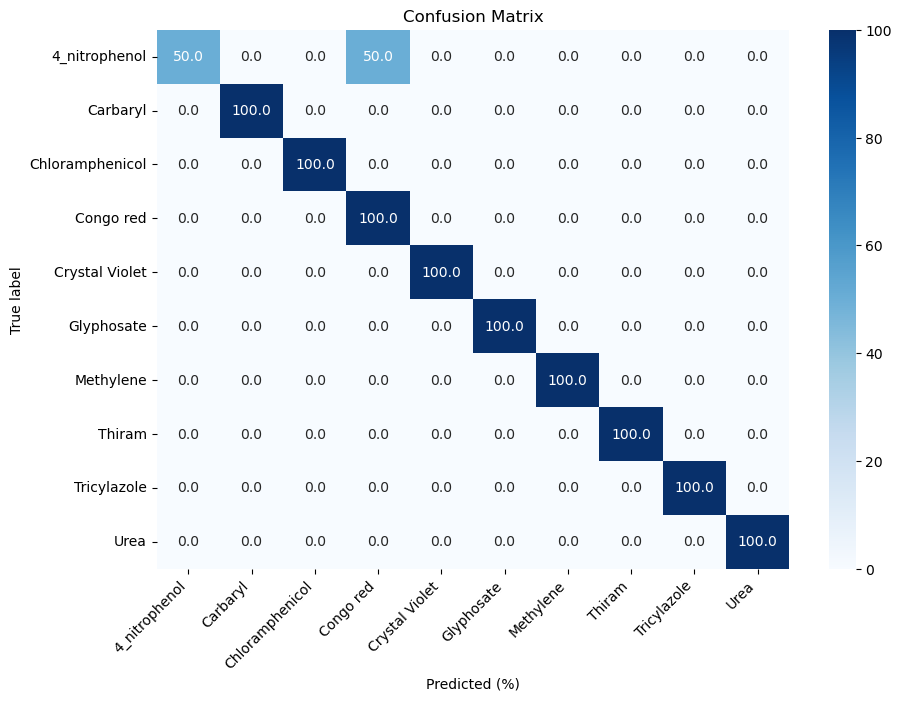

In [20]:
print(model_predict(X_test, y_test, ensemble_clf, X_min, X_max, X_mean, X_std)['Predict'])
print(y_test.T)

In [ ]:
proba = ensemble_clf.predict_proba(X_test)
proba[0]


In [32]:
model_predict(X_test, y_test, models[0], X_min, X_max, X_mean, X_std, path = 'Tricyclazole So sanh.txt')['Class']

SyntaxError: invalid syntax (3644098359.py, line 17)

In [ ]:
U = U_for_pca(X_train, X_mean, n_components = 3)
X_train_PCA = extract_PCA(X_train, X_mean, n_components=3)
# X_test_PCA = pca(X_test, X_mean, U)
X_test_PCA = extract_PCA(X_test, X_mean, n_components=3)

In [ ]:
Grid_search_model(X_train_PCA,y_train, cv = 3)

In [ ]:
models = [LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear'),
          SVC(C = 10, degree = 2, gamma = 'scale', shrinking = True,  probability=True, kernel = 'linear'),
          KNeighborsClassifier(algorithm = 'auto',p = 1, weights = 'uniform', n_neighbors = 3, metric = 'euclidean'),
          DecisionTreeClassifier(criterion= 'gini', max_depth= 8, min_samples_leaf= 2, min_samples_split = 2, splitter= 'best',  random_state = 42),
          RandomForestClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 50,  random_state = 42),
          BernoulliNB(alpha=0.1)]

In [ ]:
print(model_predict(X_train_PCA, y_train, X_test_PCA, y_test, models[5], X_min, X_max, X_mean, X_std)['Predict'])
print(y_test.T)

In [ ]:
model = modelAE(X_train, out_features = 10, num_epochs = 100, learning_rate = 0.01)

In [ ]:
X_train_AE = extractAE(model, X_train)
X_test_AE = extractAE(model, X_test)

In [ ]:
Grid_search_model(X_train_AE,y_train, cv = 3)

In [ ]:
models = [LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear'),
          SVC(C = 10, degree = 2, gamma = 'scale', shrinking = True,  probability=True, kernel = 'linear'),
          KNeighborsClassifier(algorithm = 'auto',p = 1, weights = 'uniform', n_neighbors = 3, metric = 'euclidean'),
          DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, min_samples_leaf= 1, min_samples_split = 2, splitter= 'best',  random_state = 42),
          RandomForestClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100,  random_state = 42),
          BernoulliNB(alpha=0.01)]

In [ ]:
print(model_predict(X_train_AE, y_train, X_test_AE, y_test, models[0], X_min, X_max, X_mean, X_std)['Predict'])
print(y_test.T)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=30)  

X_tsne = tsne.fit_transform(X)


In [ ]:
def visualize(X, y, option="3d", eval= 0, azim = 0, legend = True):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
    fig = plt.figure()
    if option == "3d":
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(111)
    for c in range(len(paths)):
        idx = np.where(y == c)[0]
        if option == "3d":
            ax.scatter3D(X[idx,3], X[idx,2], X[idx,4], c=colors[c], label=f"{labels[c]}")
            ax.view_init(elev=eval, azim=azim)
        else:
            ax.scatter(X[idx,0], X[idx,1], c=colors[c], label=f"{labels[c]}")
    if legend == True:
        ax.legend()
    
    plt.show()

In [ ]:
visualize(X,y, option = "3d",eval = 20, azim = 180, legend = True)